In [1]:
import pandas as pd
import csv
import nltk as nltk
from bs4 import BeautifulSoup 
import pyarrow as pa
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from dask.diagnostics import ProgressBar
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import export_graphviz
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import hamming_loss
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import pickle
import spacy
import swifter
import wordninja
from nltk.corpus import wordnet
from tqdm import tqdm
from tqdm.auto import tqdm
tqdm.pandas(desc="Progress Bar")
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfTransformer
from matplotlib import cm

In [2]:
dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression()
mn = MultinomialNB()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()
tree = tree.DecisionTreeClassifier()
knn = KNeighborsClassifier(n_jobs=32)
rfc10 = RandomForestClassifier(n_estimators=1000, n_jobs=32) # 10 Trees
rfc100 = RandomForestClassifier(n_estimators=1000, n_jobs=32) # 100 Trees
rfc1000 = RandomForestClassifier(n_estimators=1000, n_jobs=32) # 1000 Trees

In [3]:
with open ('C:/Users/lanzc/Documents/word_removal.txt', 'r') as f:
    word_removal = [row[0] for row in csv.reader(f,delimiter='\t')]

In [4]:
states = ["alabama","alaska","arizona","arkansas","california","colorado","connecticut","delaware","florida","georgia","hawaii","idaho","illinois","indiana","iowa","kansas","kentucky","louisiana","maine","maryland","massachusetts","michigan","minnesota","mississippi","missouri","montana",
"nebraska","nevada","new hampshire","new jersey","new mexico","new york","north carolina","north dakota","ohio","oklahoma","oregon","pennsylvania","rhode island","south carolina","south dakota","tennessee","texas","utah",
"vermont","virginia","washington","west virginia","wisconsin","wyoming","al", "ak", "az", "ar", "ca", "co", "ct", "dc", "de", "fl", "ga", "hi", "id", "il", "in", "ia", "ks", "ky", "la", "me", "md", "ma", "mi", "mn", "ms", "mo", "mt", "ne", "nv", "nh", "nj", 
"nm", "ny", "nc", "nd", "oh", "ok", "or", "pa", "ri", "sc", "sd", "tn", "tx", "ut", "vt", "va", "wa", "wv", "wi", "wy"]

In [5]:
df1 = pd.read_csv("E:/Data_Science_URLs/Final Project 5 NLP Data_1(1).csv", encoding="ISO-8859-1", skiprows=1, header=None)
df2 = pd.read_csv("E:/Data_Science_URLs/Final Project 5 NLP Data_1(2).csv", encoding="ISO-8859-1", skiprows=1, header=None)
df3 = pd.read_csv("E:/Data_Science_URLs/Final Project 5 NLP Data_1(3).csv", encoding="ISO-8859-1", skiprows=1, header=None)
df4 = pd.read_csv("E:/Data_Science_URLs/Final Project 5 NLP Data_2(1).csv", encoding="ISO-8859-1", skiprows=1, header=None)
df5 = pd.read_csv("E:/Data_Science_URLs/Final Project 5 NLP Data_2(3).csv", encoding="ISO-8859-1", skiprows=1, header=None)
df6 = pd.read_csv("E:/Data_Science_URLs/Final Project 5 NLP Data_2(2).csv", encoding="ISO-8859-1", skiprows=1, header=None)
df7 = pd.read_csv("E:/Data_Science_URLs/Final Project 5 NLP Data_3.csv", encoding="ISO-8859-1", skiprows=1, header=None)
df8 = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0)
df8.head()

,0,1,2,3,4,5
0,Data Science Analyst - RH,Reyes Holdings,"Rosemont, IL 60018",https://www.indeed.com/viewjob?jk=2d7fe8e22486...,"Data Science Analyst - RH - Rosemont, IL 60018...",Data Science Analyst - RHReyes Holdings54 revi...
1,Senior Data Engineer,The Predictive Index,Massachusetts,https://www.indeed.com/viewjob?jk=13fe79f97061...,Senior Data Engineer - Massachusetts - Indeed.com,Senior Data EngineerThe Predictive Index5 revi...
2,Data Scientist II,NaN,California,https://www.indeed.com/viewjob?cmp=Data-Analys...,Data Scientist II - California - Indeed.com,Data Scientist IIData Analysis Inc.CaliforniaE...
3,"Data Engineer, Medical Diagnostics",NaN,"Mountain View, CA 94043",https://www.indeed.com/viewjob?cmp=Specific-Di...,"Data Engineer, Medical Diagnostics - Mountain ...","Data Engineer, Medical DiagnosticsSpecific Dia..."
4,Data Scientist II,NaN,"Los Angeles, CA 90066",https://www.indeed.com/viewjob?cmp=O%27Neil-Gl...,"Data Scientist II - Los Angeles, CA 90066 - In...",Data Scientist IIO'Neil Global AdvisorsLos Ang...


In [6]:
df = df8.drop(df8.columns[[1, 2, 3, 4]], axis=1)

In [7]:
df.rename(columns = {0:'Title', 5:'Desc'}, inplace = True) 

In [8]:
df['Title'] = df['Title'].str.lower()
df['Desc'] = df['Desc'].str.lower()

In [9]:
nltk.download('stopwords')
nltk.download('wordnet')
lemma = nltk.WordNetLemmatizer()
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~-'
token = nltk.ToktokTokenizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lanzc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lanzc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
df = df.dropna()
df[df.Title != 'nan']

,Title,Desc
0,data science analyst - rh,data science analyst - rhreyes holdings54 revi...
1,senior data engineer,senior data engineerthe predictive index5 revi...
2,data scientist ii,data scientist iidata analysis inc.californiae...
3,"data engineer, medical diagnostics","data engineer, medical diagnosticsspecific dia..."
4,data scientist ii,data scientist iio'neil global advisorslos ang...
...,...,...
1198,field research - seasonal,field research - seasonalsgs33 reviewswyomings...
1199,lab medical lab scientist i,lab medical lab scientist isonora quest labora...
1200,natural resources specialist (recreation),natural resources specialist (recreation)us de...
1201,chief economist,chief economiststate of wyoming108 reviewscasp...


In [11]:
title_stopwords = stopwords.words('english')
title_stopwords.extend(('reviews', 'ii', 'iii','&amp','â\x80\x93','staff','remote','rh','1','2','3','\x96','â','\x80','\x94','\x93','\x97','\x8c','\x82','ä','¢','sr.','senior','sr',
                      'nationwide','opportunities','climate','change','solutions','principal','lead','manager','consultant','big','senior/principal','ai/ml','director','healthcare',
                      'co-op','july','december','2021','temporary','%s','%','â','ii-iii','2/','var','zone','id','mosaic','window','p','e','month','months','â\\x80\\x93','street',
                     'ã','&#124','nan'))
title_stopwords.extend(states)
print(title_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
def clean_punct(text):
    stop = set(punct)
    words=token.tokenize(text)
    filtered = [w for w in words if not w in stop]
    return ' '.join(map(str, filtered))

def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def TitlestopWordsRemove(text):
    stop = set(title_stopwords)
    words=token.tokenize(text)
    filtered = [w for w in words if not w in stop]
    return ' '.join(map(str, filtered))

def word_ninja(text):
    words=token.tokenize(text)
    listninja=[]
    for w in words:
        x=wordninja.split(w)
        listninja.append(x)
    return ' '.join(map(str, listninja))

def split_and_join(sentence):
    words =sentence.split(' ')
    joined_sentence = '-'.join(words)
    return joined_sentence

def DescstopWordsRemove(text):
    stop = set(desc_stopwords)
    words=token.tokenize(text)
    filtered = [w for w in words if not w in stop]
    return ' '.join(map(str, filtered))

def Word_Removal(text):
    stop = set(word_removal)
    words=token.tokenize(text)
    filtered = [w for w in words if not w in stop]
    return ' '.join(map(str, filtered))

In [15]:
df['Title'] = df['Title'].progress_apply(lambda x: clean_punct(x)) 
df['Title'] = df['Title'].progress_apply(lambda x: lemitizeWords(x)) 
df['Title'] = df['Title'].progress_apply(lambda x: TitlestopWordsRemove(x))

In [16]:
df.dropna()
df['Title'] = df['Title'].str.replace(' ', '')
df['Title'] = df['Title'].progress_apply(lambda x: x.split())

In [ ]:
# df['Desc'] = df['Desc'].progress_apply(lambda x: word_ninja(x))
df['Desc'] = df['Desc'].progress_apply(lambda x: lemitizeWords(x))
df['Desc'] = df['Desc'].progress_apply(lambda x: clean_punct(x)) 
df['Desc'] = df['Desc'].progress_apply(lambda x: Word_Removal(x))
df.to_pickle("C:/Users/lanzc/Documents/df_1stclean.pkl")

In [ ]:
df['Desc'] = df['Desc'].str.replace(r'\d+','')
df = df.dropna()
df[df.Desc != 'nan']

df = pd.read_pickle("C:/Users/lanzc/Documents/df_1stclean.pkl")

In [18]:
freq = df['Title'].value_counts()
print(freq[0:20])

[datascientist]                                             5444
[dataengineer]                                              3552
[dataanalyst]                                                762
[scientist]                                                  524
[statisticalprogrammer]                                      506
[machinelearnengineer]                                       439
[datascience]                                                371
[acousticsignalprocessengineerdatascientistmachinelearn]     230
[applyscientist]                                             219
[researchscientist]                                          207
[datascientistproserve]                                      198
[datascientist/machinelearnsoftwareengineer]                 193
[dataarchitect]                                              185
[datascientistengineer]                                      151
[statistician]                                               150
[data;mlengineer]        

In [32]:
all_tags = [item for sublist in df['Title'].values for item in sublist]
len(all_tags)

39194

In [33]:
my_set = set(all_tags)
unique_titles = list(my_set)
len(unique_titles)

11817

In [34]:
flat = [item for sublist in df['Title'].values for item in sublist]
words = nltk.FreqDist(flat)
words = nltk.FreqDist(words)
freq_words = words.most_common(150)
features = [word[0] for word in freq_words]
features

['datascientist',
 'dataengineer',
 'dataanalyst',
 'scientist',
 'statisticalprogrammer',
 'machinelearnengineer',
 'datascience',
 'acousticsignalprocessengineerdatascientistmachinelearn',
 'applyscientist',
 'researchscientist',
 'datascientistproserve',
 'datascientist/machinelearnsoftwareengineer',
 'dataarchitect',
 'datascientistengineer',
 'statistician',
 'data;mlengineer',
 'datascienceanalyst',
 'engineerdataengineer',
 'clinicalresearchcoordinator',
 'arity-dataanalyticsengineerhomebaseworker',
 'safetydatascientist',
 'softwareengineerdata',
 'coatscientistinvestigator',
 'technicalsourcerdatascience',
 'datadeliveryengineer',
 'market;salesdatascience',
 'sasdataengineer',
 'imagedatascientistcomputationalpathology',
 'statisticiandatascientist',
 'clinicaltrialdatascience',
 'datascienceengineer',
 'datascientistprivacy',
 'researchanalyst',
 'researchtechnician',
 'dataanalyticsreleasetrainengineer',
 'softwareengineer',
 'deeplearnresearcher',
 'datasoftwareengineer',


In [21]:
desc_stopwords = title_stopwords
desc_stopwords.extend(('data','scientist','engineer','analyst','research','learn','science','analytics','machine','software','associate','clinical','intelligence',
'statistical','ai','architect','apply','development','business','programmer','center','market','assistant','product','process','artificial',
'lab','management','specialist','coordinator','operations','medical','statistician','program','developer','platform','technician','health','service','technical',
'laboratory','nurse','technologist','junior','life','system','master',))
desc_stopwords.extend((features))
print(desc_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
df['Desc'] = df['Desc'].progress_apply(lambda x: DescstopWordsRemove(x))

In [21]:
def top_titles (titles):
    filter = []
    for i in range(0, len(titles)):
        if titles[i] in features:
            filter.append(titles[i])
    return filter

In [24]:
df['Title'] = df['Title'].progress_apply(lambda x: top_titles (x))
df['Title'] = df['Title'].progress_apply(lambda x: x if len(x)>0 else None)
df.shape

(39209, 2)

df['Title']=df['Title'].fillna("")
df['Desc']=df['Desc'].fillna("")

In [35]:
df.dropna(subset=['Title'], inplace=True)
df.shape

(39209, 2)

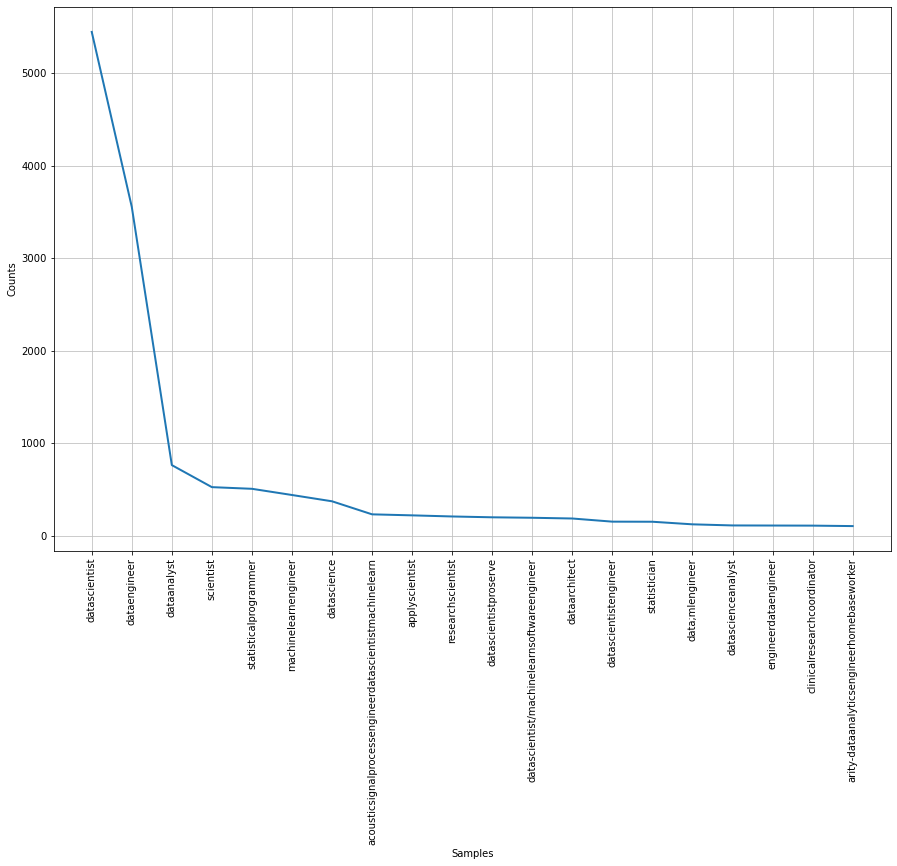

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [26]:
fig, ax = plt.subplots(figsize=(15, 10))
words.plot(20, cumulative=False)

In [38]:
df.loc[df['Title'].isin(features) == False, 'Title'] = 'no_match'

In [22]:
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'
token = nltk.ToktokTokenizer()
nltk.download('stopwords')
nltk.download('wordnet')
lemma = nltk.WordNetLemmatizer()
stop = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lanzc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lanzc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
x = df['Desc']
y = df['Title'] 

In [24]:
multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

In [27]:
multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

vectorizer = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)
tfidf = vectorizer.fit_transform(x)
tfidf.shape

(39209, 1000)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(tfidf, y_bin, test_size = 0.2, random_state = 0)

In [29]:
def avg_jacard(y_true,y_pred):

    jacard = np.minimum(y_true,y_pred).sum(axis=1) / np.maximum(y_true,y_pred).sum(axis=1)
    
    return jacard.mean()*100

def print_score(y_pred, clf):
    print("Classifier: ", clf.__class__.__name__)
    print("Jacard Distance: {}".format(avg_jacard(y_test, y_pred)))
    print("Hamming Loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("\n")

In [30]:
for classifier in [dummy, sgd, lr, mn, svc, perceptron, pac, tree, knn, rfc10, rfc100, rfc1000]: # add or remove rfc 10-1000 for better or worse performance
    clf = OneVsRestClassifier(classifier)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print_score(y_pred, classifier)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 6 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 16 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 18 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 22 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 29 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramD

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 271 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 276 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 277 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 285 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 287 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\Pr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 810 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 812 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 818 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 826 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 827 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\Pr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1086 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1091 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1103 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1104 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1110 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1351 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1356 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1357 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1374 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1378 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1611 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1625 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1633 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1634 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1648 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1891 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1910 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1914 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1921 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 1924 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 2428 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 2429 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 2456 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 2457 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 2464 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 2971 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 2973 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 2976 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 2978 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 2986 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 3269 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 3274 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 3277 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 3291 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 3292 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 3806 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 3814 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 3839 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 3840 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 3849 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 4342 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 4343 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 4345 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 4353 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 4366 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 4612 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 4613 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 4616 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 4619 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 4629 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 5160 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 5175 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 5192 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 5193 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 5209 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 5688 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 5692 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 5694 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 5702 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 5705 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 6230 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 6234 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 6235 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 6238 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 6240 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 6757 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 6778 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 6780 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 6785 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 6791 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 7028 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 7032 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 7046 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 7057 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 7065 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 7303 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 7312 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 7313 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 7317 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 7322 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 7846 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 7854 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 7855 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 7861 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 7862 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 8132 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 8147 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 8159 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 8161 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 8162 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 8404 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 8415 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 8417 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 8418 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 8425 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 8671 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 8678 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 8680 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 8697 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 8724 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 8944 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 8947 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 8960 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 8962 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 8967 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 9223 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 9225 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 9226 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 9230 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 9231 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 9437 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 9441 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 9446 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 9457 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 9463 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 9722 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 9725 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 9737 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 9741 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\multiclass.py:76: UserWarning: Label not 9742 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


KeyboardInterrupt: 

In [33]:
def print_top10(feature_names, clf, class_labels):

    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[i])[-10:]
        print("%s: %s" % (class_label,
              " ".join(feature_names[j] for j in top10)))

In [34]:
param_grid = {'estimator__C':[1,10,100,1000]
              }

In [35]:
svc = OneVsRestClassifier(LinearSVC())
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv= 30, verbose=10, n_jobs=32, scoring = make_scorer(avg_jacard,greater_is_better=True))
CV_svc.fit(x_train, y_train)

Fitting 30 folds for each of 4 candidates, totalling 120 fits


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   8 tasks      | elapsed:  2.5min
[Parallel(n_jobs=32)]: Done  21 tasks      | elapsed:  2.6min
[Parallel(n_jobs=32)]: Done  34 tasks      | elapsed:  6.2min
[Parallel(n_jobs=32)]: Done  49 tasks      | elapsed:  6.3min
[Parallel(n_jobs=32)]: Done  70 out of 120 | elapsed: 10.4min remaining:  7.4min
[Parallel(n_jobs=32)]: Done  83 out of 120 | elapsed: 10.5min remaining:  4.7min
[Parallel(n_jobs=32)]: Done  96 out of 120 | elapsed: 12.5min remaining:  3.1min
[Parallel(n_jobs=32)]: Done 109 out of 120 | elapsed: 14.0min remaining:  1.4min
[Parallel(n_jobs=32)]: Done 120 out of 120 | elapsed: 14.0min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=30, estimator=OneVsRestClassifier(estimator=LinearSVC()),
             n_jobs=32, param_grid={'estimator__C': [1, 10, 100, 1000]},
             scoring=make_scorer(avg_jacard), verbose=10)

In [55]:
CV_svc.best_params_

{'estimator__C': 100}

In [56]:
best_model = CV_svc.best_estimator_

In [57]:
y_pred = best_model.predict(x_test)

print_score(y_pred, best_model)

Classifier:  OneVsRestClassifier
Jacard Distance: 88.33460269103833
Hamming Loss: 0.11931962427011933




In [39]:
feature_names = vectorizer.get_feature_names()

In [40]:
print_top10(feature_names, best_model, multilabel_binarizer.classes_)

acousticsignalprocessengineerdatascientistmachinelearn: systems bring sonar corporation millers acoustic acoustics underwater signal ssc
aiengineerbackend: interfacing cal pub boy radle end cloud cd pearson back
aiengineerui;releasemanagementfluttermobile: oauth wt timezones userbase amp plus ios flutter ui release
aigameengineer: trigonometry unannounced familiarity tree simulation corporation star plymouth game dock
aisgomachinelearnplatformarchitect: friend undisputed bono brush transfer another strategic articulate investments gpu
analytics: leadership priceline bless virgin temple customer reverb zeta topics owner
aoddatascienceadvisor: certificate shall fedex previously license express article criminal convict offenses
applyscientist: continuously please decide satisfy minority amazon visit java skilled language
arity-dataanalyticsengineerhomebaseworker: found see poster heart familiarity day transportation allstate ty ari
artificialintelligenceapplyartificialintelligencefullstac

engineeraiperceptionalgorithm: stereo depth algorithm motion estimation black construct perception detection sesame
engineerdataengineer: unite rationalization ui fargo samsung meri bergen access iam electronics
environmentalscientist: delta status syracuse compliance vertex non wood exempt fls environmental
environmentaltechnician/scientist: inc aci environmental office consult water delineation alliance burg canons
experiencedataengineer: end back launder trace db scopes liberty crypto currency mutual
financialdataanalyst: account ledger cpa gil administration safe tallon berkley reservoir financial
globaldatacenterconnectivityqa/qcregionalengineer: assurance installation conformance bim isp plant quality construction qc qa
imagedatascientistcomputationalpathology: diagnosis leave pathologists hm societal computational image bioscience pathology reveal
incentivesproficiencydataanalyst: prescient synchronize command task order proficiency foreign pb subordinate incentives
laboratorysu

In [41]:
for i in range(y_train.shape[1]):
    print(multilabel_binarizer.classes_[i])
    tn, fp, fn, tp = confusion_matrix(y_test[:,i], y_pred[:,i]).ravel()
    print(confusion_matrix(y_test[:,i], y_pred[:,i]))
    print("True Negatives: ",tn)
    print("False Positives: ",fp)
    print("False Negatives: ",fn)
    print("True Positives: ",tp)
    print("Precision Score: ", precision_score(y_test[:,i], y_pred[:,i], average='weighted'))
    print("F1 Score: ", f1_score(y_test[:,i], y_pred[:,i], average='weighted'))
    print("Recall Score: ", recall_score(y_test[:,i], y_pred[:,i], average='weighted'))
    print("\n")

acousticsignalprocessengineerdatascientistmachinelearn
[[3885    0]
 [   0   54]]
True Negatives:  3885
False Positives:  0
False Negatives:  0
True Positives:  54
Precision Score:  1.0
F1 Score:  1.0
Recall Score:  1.0


aiengineerbackend
[[3928    0]
 [   0   11]]
True Negatives:  3928
False Positives:  0
False Negatives:  0
True Positives:  11
Precision Score:  1.0
F1 Score:  1.0
Recall Score:  1.0


aiengineerui;releasemanagementfluttermobile
[[3928    0]
 [   0   11]]
True Negatives:  3928
False Positives:  0
False Negatives:  0
True Positives:  11
Precision Score:  1.0
F1 Score:  1.0
Recall Score:  1.0


aigameengineer
[[3929    0]
 [   0   10]]
True Negatives:  3929
False Positives:  0
False Negatives:  0
True Positives:  10
Precision Score:  1.0
F1 Score:  1.0
Recall Score:  1.0


aisgomachinelearnplatformarchitect
[[3933    0]
 [   0    6]]
True Negatives:  3933
False Positives:  0
False Negatives:  0
True Positives:  6
Precision Score:  1.0
F1 Score:  1.0
Recall Score:  1.0



 [   0   10]]
True Negatives:  3929
False Positives:  0
False Negatives:  0
True Positives:  10
Precision Score:  1.0
F1 Score:  1.0
Recall Score:  1.0


dataanalytics
[[3933    0]
 [   4    2]]
True Negatives:  3933
False Positives:  0
False Negatives:  4
True Positives:  2
Precision Score:  0.9989855455720051
F1 Score:  0.9987309003600976
Recall Score:  0.998984513835999


dataanalyticsengineer
[[3931    0]
 [   6    2]]
True Negatives:  3931
False Positives:  0
False Negatives:  6
True Positives:  2
Precision Score:  0.9984790921600122
F1 Score:  0.9980203827742673
Recall Score:  0.9984767707539984


dataanalyticsreleasetrainengineer
[[3926    0]
 [   0   13]]
True Negatives:  3926
False Positives:  0
False Negatives:  0
True Positives:  13
Precision Score:  1.0
F1 Score:  1.0
Recall Score:  1.0


dataarchitect
[[3914    1]
 [   4   20]]
True Negatives:  3914
False Positives:  1
False Negatives:  4
True Positives:  20
Precision Score:  0.9986951524864887
F1 Score:  0.998688573450339

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



True Negatives:  3899
False Positives:  0
False Negatives:  0
True Positives:  40
Precision Score:  1.0
F1 Score:  1.0
Recall Score:  1.0


datascientistrevenuemanagement
[[3932    0]
 [   0    7]]
True Negatives:  3932
False Positives:  0
False Negatives:  0
True Positives:  7
Precision Score:  1.0
F1 Score:  1.0
Recall Score:  1.0


datascientistsupplychainoptimization
[[3930    0]
 [   0    9]]
True Negatives:  3930
False Positives:  0
False Negatives:  0
True Positives:  9
Precision Score:  1.0
F1 Score:  1.0
Recall Score:  1.0


datascientisttelecommute
[[3931    0]
 [   0    8]]
True Negatives:  3931
False Positives:  0
False Negatives:  0
True Positives:  8
Precision Score:  1.0
F1 Score:  1.0
Recall Score:  1.0


datascientistu.s.telecommute
[[3928    0]
 [   0   11]]
True Negatives:  3928
False Positives:  0
False Negatives:  0
True Positives:  11
Precision Score:  1.0
F1 Score:  1.0
Recall Score:  1.0


datasoftwareengineer
[[3925    1]
 [   1   12]]
True Negatives:  3925
Fa

 [   0   17]]
True Negatives:  3922
False Positives:  0
False Negatives:  0
True Positives:  17
Precision Score:  1.0
F1 Score:  1.0
Recall Score:  1.0


sasdataengineer
[[3924    0]
 [   0   15]]
True Negatives:  3924
False Positives:  0
False Negatives:  0
True Positives:  15
Precision Score:  1.0
F1 Score:  1.0
Recall Score:  1.0


scientist
[[3810    4]
 [  10  115]]
True Negatives:  3810
False Positives:  4
False Negatives:  10
True Positives:  115
Precision Score:  0.9963985849540528
F1 Score:  0.9964034959521115
Recall Score:  0.9964457984259965


scientistbioreactorprocessdesign
[[3935    0]
 [   0    4]]
True Negatives:  3935
False Positives:  0
False Negatives:  0
True Positives:  4
Precision Score:  1.0
F1 Score:  1.0
Recall Score:  1.0


scientistimmunologist
[[3934    0]
 [   0    5]]
True Negatives:  3934
False Positives:  0
False Negatives:  0
True Positives:  5
Precision Score:  1.0
F1 Score:  1.0
Recall Score:  1.0


scientistlifescience
[[3926    0]
 [   0   13]]
True

In [42]:
# Bag of words
# Use of titles
# How to present this - 
# Given the skill - Given the title

# Bring down number of classes
# 

nmf_model = NMF(18)
doc_topic = nmf_model.fit_transform(tfidf)
doc_topic.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


(19691, 18)

In [43]:
topic_word = nmf_model.components_
topic_word.shape

(18, 18429)

In [44]:
words = vectorizer.get_feature_names()
t = nmf_model.components_.argsort(axis=1)[:,-1:-20:-1]
topic_words = [[words[e] for e in l] for l in t]
topic_words

[['team',
  'cloud',
  'build',
  'design',
  'review',
  'model',
  'financial',
  'tool',
  'sql',
  'provide',
  'azure',
  'amp',
  'information',
  'use',
  'technology',
  'systems',
  'drive',
  'discover',
  'analysis'],
 ['amazon',
  'ml',
  'aw',
  'web',
  'model',
  'customers',
  'professional',
  'inc',
  'operational',
  'customer',
  'build',
  'com',
  'deliver',
  'en',
  'deep',
  'llc',
  'enterprises',
  'dive',
  'invention'],
 ['daly',
  'server',
  'predictive',
  'temporarily',
  'microsoft',
  'bachelor',
  'sql',
  'dubai',
  'terra',
  'bytes',
  'hire',
  'top',
  'phds',
  'universities',
  'python',
  'us',
  'location',
  'qualifications',
  'days'],
 ['dni',
  'aug',
  'analytic',
  'tyson',
  'corner',
  'advise',
  'efforts',
  'clearance',
  'llc',
  'top',
  'syntax',
  'algorithms',
  'analyse',
  'common',
  'polygraph',
  'ic',
  'model',
  'security',
  'secret'],
 ['loi',
  'tte',
  'cognitive',
  'help',
  'clients',
  'offer',
  'professional

In [45]:
plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")

In [46]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('Sum of the ■ Error Cluster Center')

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


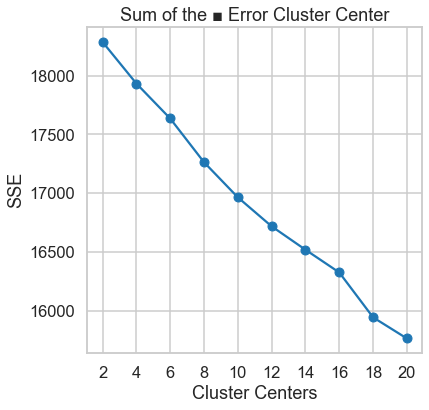

In [47]:
find_optimal_clusters(tfidf, 20)

In [48]:
clusters = MiniBatchKMeans(n_clusters=18, init_size=1024, batch_size=2048, random_state=20).fit_predict(tfidf)

In [49]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('T-SNE')

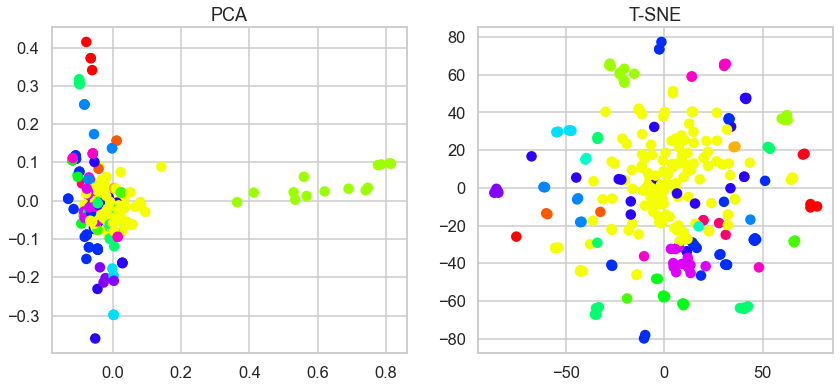

In [50]:
plot_tsne_pca(tfidf, clusters)

In [51]:
def plot_tsne_pca2(data, labels, sizelist, cmap='tab10'):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), sizelist, replace=False)

    pca = PCA(n_components=2).fit_transform(data[max_items, :].todense())
    tsne = TSNE().fit_transform(PCA(n_components=1).fit_transform(data[max_items, :].todense()))

    idx = np.random.choice(range(pca.shape[0]), sizelist, replace=False)
    label_subset = labels[max_items]
    f, ax = plt.subplots(1, 2, figsize=(20, 6))

    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset, cmap=cmap)
    ax[0].set_title('PCA Cluster Plot')

    sc = ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset, cmap=cmap)
    ax[1].set_title('TSNE Cluster Plot')
    ax[1].legend(*sc.legend_elements(), title='clusters')

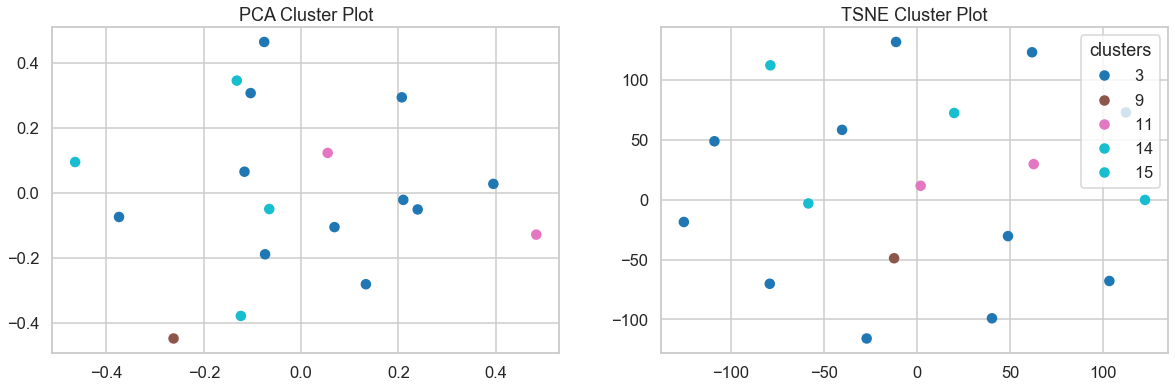

In [52]:
plot_tsne_pca2(tfidf, clusters, 18)

In [53]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

In [54]:
get_top_keywords(tfidf, clusters, vectorizer.get_feature_names(), 18)


Cluster 0
algorithms,common,minimum,llc,syntax,successful,clearance,bachelor,server,efforts,advise,corner,tyson,top,analytic,aug,dni,daly

Cluster 1
ontology,transformers,unrestricted,detection,systems,technologies,innovate,graph,black,sesame,temporarily,estimation,algorithm,annotation,ml,gp,nlp,mass

Cluster 2
optimize,sql,spend,temporarily,reimbursement,benefit,tuition,warehouse,hand,aw,score,tax,propensity,churn,model,ppell,blu,cora

Cluster 3
provide,tool,skills,include,return,sql,employers,save,support,api,design,systems,use,cloud,build,model,review,team

Cluster 4
competitor,invention,deep,en,deliver,build,operational,inc,llc,professional,com,customer,customers,model,web,aw,ml,amazon

Cluster 5
frequency,pandas,chance,safer,fair,model,weeks,ordinance,poster,option,stats,sf,ty,owl,ari,blue,allstate,telematics

Cluster 6
fellow,may,faculty,edu,uw,medicine,school,position,cell,molecular,department,rich,postdoctoral,study,uva,duke,biology,university

Cluster 7
accommodations,corpora